<a href="https://colab.research.google.com/github/nimratmann/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Loading Dataset

In [67]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [68]:
df = pd.DataFrame(X)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


Columns:
1. Area: Returns the number of pixels within the boundaries of the rice grain.
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
7. Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels
8. Class: Commeo and Osmancik.

# Simple Regression



> Fit the Regression Model


In [136]:
import statsmodels.api as sm

X = sm.add_constant(df['Area'])  # Adds a constant term to the predictor
y = df['Eccentricity']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Eccentricity   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          1.32e-111
Time:                        05:46:53   Log-Likelihood:                 9598.6
No. Observations:                3810   AIC:                        -1.919e+04
Df Residuals:                    3808   BIC:                        -1.918e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8333      0.002    357.572      0.0

## Checking Assumptions



> Assessing linearity of the relationship



In [75]:
# Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9562731594668932, p-value=0.8353033397451335


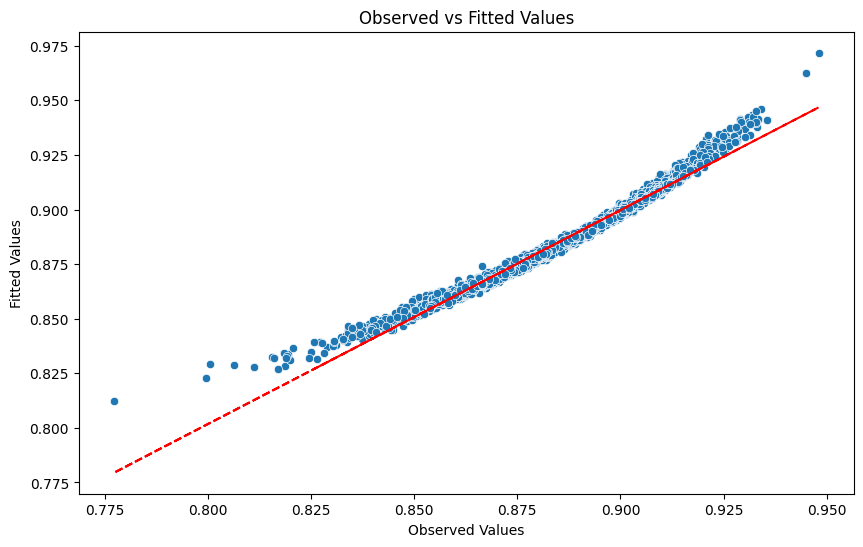

In [113]:
residuals = results.resid
fitted = results.fittedvalues

# Calculating the best fit line
best_fit_line = np.polyfit(df['Eccentricity'], fitted, 1)
y_fit = np.poly1d(best_fit_line)(df['Eccentricity'])

# Plotting observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Eccentricity'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot(df['Eccentricity'], y_fit, color='red', linestyle='--')

plt.show()




> Assessing Normality of Residuals



In [73]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9456958174705505, p-value=2.636219278429053e-06


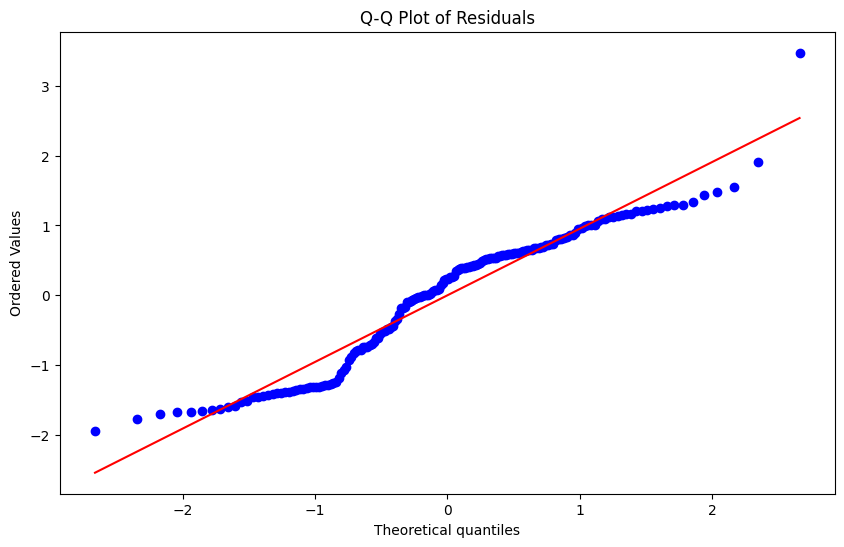

In [74]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



> Assessing the Homogeneity of Variance of Residuals



In [84]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, X)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.328848944684255, p-value=3.00548981419672e-10


## Analysis
Variables:
1. Dependent: Eccentricity
2. Independent: Area

Linearity:


> p-value: 0.835


The p-value associated with the test for linearity was greater than 0.05 (p > 0.05), suggesting insufficient evidence to reject the null hypothesis. Therefore, we fail to reject the assumption of linearity, indicating that there is no significant evidence that the relationship between variables is nonlinear.

Normality:


> p-value: 2.636219278429053e-06


The p-value from the Shapiro-Wilk test was less than 0.05 (p < 0.05), providing evidence to reject the null hypothesis. This suggests that the data may not follow a normal distribution and the results are statistically significant.

Homogeneity of Variance:


> p-value: 3.00548981419672e-10


The p-value obtained from the Goldfeld-Quandt test is extremely small (p < 0.05), indicating we reject the null hypothesis. Therefore, there is significant evidence to suggest that the variance of residuals is not constant across different levels of the independent variable.

Results of Linear Regression:


> R-squared: 0.124


> p-value: 0.000




R-squared measures the proportion of the variance in the dependent variable.The R-squared value of 0.278 obtained from the linear regression indicates a weak association between the Area and Eccentricity variables. Additionally, 12.4% of the variability in Eccentricity based on the variation in Area. The p-value of the Area is less than 0.05 (p < 0.05), indicating there is a statistically signficant relation between Area and Eccentricity.

# Multiple Regression



> Fit the Regression Model



In [128]:
X = df[['Area', 'Major_Axis_Length','Perimeter' ]]
X = sm.add_constant(X)

model = sm.OLS(df['Eccentricity'], X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Eccentricity   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 3.421e+04
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        05:30:49   Log-Likelihood:                 15692.
No. Observations:                3810   AIC:                        -3.138e+04
Df Residuals:                    3806   BIC:                        -3.135e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6847      0.00

## Checking Assumptions



> Checking Multicollinearity



In [129]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
            Variable          VIF
0              const  1077.317887
1               Area    23.671220
2  Major_Axis_Length    28.166269
3          Perimeter    78.802645




> Assessing Linearity of the Relationship



In [130]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0209101528395963, p-value=0.3258860876084727


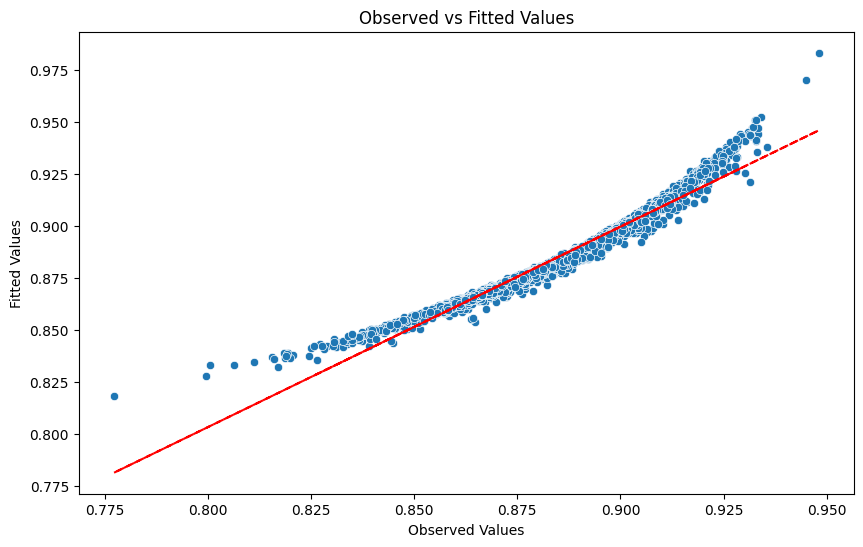

In [131]:
residuals = results.resid
fitted = results.fittedvalues

# Calculating the best fit line
best_fit_line = np.polyfit(df['Eccentricity'], fitted, 1)
y_fit = np.poly1d(best_fit_line)(df['Eccentricity'])

# Plotting observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Eccentricity'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot(df['Eccentricity'], y_fit, color='red', linestyle='--')

plt.show()



> Assessing Normality of Residuals



Shapiro-Wilk Test: W=0.8864507675170898, p-value=0.0


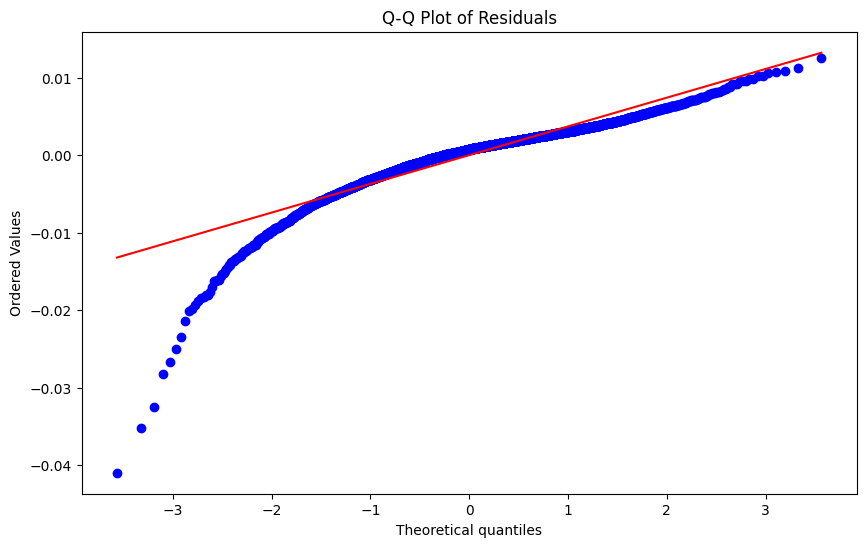

In [135]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



> Assessing the Homogeneity of Variance of Residuals



In [133]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.968027570279692, p-value=0.7606153605100829


## Analysis

Variables:
1. Dependent: Eccentricity
2. Independent: Area, Major_Axis_Length, Perimeter

Linearity:


> p-value: 0.325



The p-value associated with the test for linearity was greater than 0.05 (p > 0.05), suggesting insufficient evidence to reject the null hypothesis. Therefore, we fail to reject the assumption of linearity, indicating that there is evidence of a linear relationship between variables.

Normality:



> p-value: 0.0



The p-value from the Shapiro-Wilk test was less than 0.05 (p < 0.05), providing evidence to reject the null hypothesis. This suggests that the data may not follow a normal distribution and the results are statistically significant.

Homogeneity of Variance:



> p-value: 0.760



The p-value obtained from the Goldfeld-Quandt test is greater than 0.05 (p > 0.05), indicating that there is insufficient evidence to reject the null hypothesis of homogeneity of variance.

Results of Linear Regression:



> R-squared: 0.964


> p-value (Area, Major_Axis_Length, Perimeter) : 0.000



The R-squared value of 0.964 suggests that approximately 96.4% of the variance in Eccentricity is explained by the linear combination of the independent variables (Area, Major_Axis_Length, Perimeter). This is a very high proportion, indicating a strong fit of the model to the data.
The p-value of 0.000 (or very close to 0) for the coefficients of the predictors (Area, Major_Axis_Length, Perimeter) indicates that these variables are statistically significant in predicting  Eccentricity. In other words, there is strong evidence to reject the null hypothesis that the coefficients are equal to zero.